<a href="https://colab.research.google.com/github/xinlei55555/PharmaHacks2023/blob/main/stem_cell_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
train_df = pd.read_csv("/content/drive/MyDrive/Hackathon Squad/PharmaHacks/stem_cells/train_data.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Hackathon Squad/PharmaHacks/stem_cells/test_data_corrected.csv")
train_df

,dd0 Cell Density,dd0-dd1 Cell Density Gradient,dd1 Cell Density,dd1-dd2 Cell Density Gradient,dd2 Cell Density,dd2-dd3 Cell Density Gradient,dd3 Cell Density,dd3-dd5 Cell Density Gradient,dd5 Cell Density,dd5-dd7 Cell Density Gradient,...,dd1 Lactate Concentration,dd3 Lactate Concentration,dd5 Lactate Concentration,dd7 Lactate Concentration,dd0 Glucose Concentration,dd1 Glucose Concentration,dd3 Glucose Concentration,dd5 Glucose Concentration,dd7 Glucose Concentration,dd10 CM Content
0,0.725,0.213793,0.8800,0.190070,1.047261,-0.040354,1.0050,0.810945,1.8200,-0.144394,...,14.025000,2.090000,17.780000,5.935000,9.180000,3.895000,9.875000,0.635000,7.555000,75.70
1,0.650,0.384615,0.9000,0.190070,1.071063,0.246426,1.3350,0.749064,2.3350,-0.144394,...,13.350000,2.165000,17.105000,12.510000,9.520000,4.470000,10.145000,1.010000,2.910000,75.00
2,0.880,0.022727,0.9000,0.190070,1.071063,-0.038338,1.0300,0.611650,1.6600,-0.144394,...,13.670000,1.775000,19.050000,7.210000,9.027500,4.415000,10.270000,0.000000,6.745000,55.60
3,0.785,0.363057,1.0700,0.190070,1.273374,-0.462059,0.6850,0.510949,1.0350,-0.144394,...,11.955000,0.995000,16.430000,14.295000,8.995000,5.155000,10.255000,2.270000,2.135000,57.70
4,0.410,0.975610,0.8100,0.190070,0.963956,1.778134,2.6780,-0.002987,2.6700,-0.376404,...,11.300000,15.100000,16.425000,14.455000,9.547500,1.700000,0.017500,1.610000,1.065000,63.00
5,0.295,0.084746,0.3200,0.190070,0.380822,1.384314,0.9080,-0.251101,0.6800,0.014706,...,10.100000,12.100000,12.130000,12.835000,10.795000,0.600000,3.605000,3.765000,3.095000,19.20
6,1.185,-0.392405,0.7200,0.190070,0.856850,1.873898,2.4625,-0.145178,2.1050,-0.420428,...,11.300000,14.700000,15.776212,16.575000,8.715000,1.800000,1.212500,2.125769,0.960000,63.80
7,1.185,-0.755274,0.2900,0.190070,0.345120,4.128648,1.7700,-0.401130,1.0600,-0.023585,...,11.500000,13.375000,18.930000,14.225000,7.135000,0.700000,0.487500,0.000000,1.765000,29.80
8,0.660,-0.037879,0.6350,0.763780,1.120000,1.026786,2.2700,-0.176211,1.8700,-0.144394,...,13.818782,14.366667,16.175000,13.370256,9.220000,3.647831,1.910347,2.130000,2.671346,60.40
9,1.210,-0.305785,0.8400,0.500000,1.260000,1.198413,2.7700,-0.393502,1.6800,-0.144394,...,13.818782,14.366667,17.275000,13.370256,9.422500,3.647831,1.910347,0.560000,2.671346,11.70


In [4]:
test_df

,dd0 Cell Density,dd0-dd1 Cell Density Gradient,dd1 Cell Density,dd1-dd2 Cell Density Gradient,dd2 Cell Density,dd2-dd3 Cell Density Gradient,dd3 Cell Density,dd3-dd5 Cell Density Gradient,dd5 Cell Density,dd5-dd7 Cell Density Gradient,...,dd1 Lactate Concentration,dd3 Lactate Concentration,dd5 Lactate Concentration,dd7 Lactate Concentration,dd0 Glucose Concentration,dd1 Glucose Concentration,dd3 Glucose Concentration,dd5 Glucose Concentration,dd7 Glucose Concentration,dd10 CM Content
0,0.650,0.376923,0.8950,0.184358,1.0600,1.301887,2.440,-0.131148,2.12,0.316038,...,13.2,16.1,10.0,11.6,11.3,5.7,0.3,4.7,2.3,88
1,0.430,0.651163,0.7100,0.887324,1.3400,1.074627,2.780,-0.532374,1.30,0.400000,...,13.4,16.5,12.6,14.6,11.5,6.2,0.6,2.7,0.7,80
2,0.680,0.470588,1.0000,0.790000,1.7900,0.446927,2.590,-0.254826,1.93,0.000000,...,12.2,16.0,11.7,10.4,12.4,5.9,1.0,3.8,3.4,92
3,0.780,0.166667,0.9100,0.439560,1.3100,0.538168,2.015,-0.136476,1.74,0.172414,...,12.1,16.5,10.1,8.9,11.6,4.8,0.3,4.7,4.1,76
4,0.575,0.295652,0.7450,1.456376,1.8300,0.256831,2.300,-0.639130,0.83,0.445783,...,12.3,17.1,11.6,11.8,10.6,5.7,1.3,4.9,5.3,21
5,0.710,-0.021127,0.6950,1.413669,1.6775,0.335320,2.240,-0.781250,0.49,0.744898,...,11.1,16.2,5.9,5.9,10.2,6.2,1.9,8.1,8.7,24
6,0.535,0.303738,0.6975,1.709677,1.8900,0.179894,2.230,-0.591928,0.91,0.769231,...,11.6,17.0,13.3,11.7,11.1,5.3,0.8,4.2,4.9,42
7,0.560,0.625000,0.9100,1.184066,1.9875,0.122013,2.230,-0.282511,1.60,0.793750,...,13.2,17.6,12.1,14.9,11.0,4.7,0.6,4.7,2.2,80
8,0.730,0.684932,1.2300,0.430894,1.7600,0.153409,2.030,0.256158,2.55,-0.164706,...,14.2,16.4,15.3,16.7,9.0,3.9,0.0,2.3,0.0,92
9,0.630,-0.206349,0.5000,0.020000,0.5100,0.882353,0.960,-0.187500,0.78,0.115385,...,11.9,16.2,12.2,13.4,9.5,5.3,2.3,4.8,3.1,74


In [54]:
y_train = train_df["dd10 CM Content"]
x_train = train_df.drop(columns=["dd10 CM Content"])
y_test = test_df["dd10 CM Content"]
x_test = test_df.drop(columns=["dd10 CM Content"])

In [55]:
y_test

0     88
1     80
2     92
3     76
4     21
5     24
6     42
7     80
8     92
9     74
10    95
11    12
12    60
13     8
14    93
15    97
16    23
17    70
Name: dd10 CM Content, dtype: int64

##labeling the data

In [56]:
sufficient_treshhold = 90
label_train = (y_train > sufficient_treshhold)*1
train_df["label"] = label_train
label_test = (y_test > sufficient_treshhold)*1
test_df["label"] = label_test
label_train.value_counts(), label_test.value_counts()

(0    29
 1    13
 Name: dd10 CM Content, dtype: int64, 0    13
 1     5
 Name: dd10 CM Content, dtype: int64)

In [7]:
train_suff = train_df[train_df["label"]==1]
train_suff

,dd0 Cell Density,dd0-dd1 Cell Density Gradient,dd1 Cell Density,dd1-dd2 Cell Density Gradient,dd2 Cell Density,dd2-dd3 Cell Density Gradient,dd3 Cell Density,dd3-dd5 Cell Density Gradient,dd5 Cell Density,dd5-dd7 Cell Density Gradient,...,dd3 Lactate Concentration,dd5 Lactate Concentration,dd7 Lactate Concentration,dd0 Glucose Concentration,dd1 Glucose Concentration,dd3 Glucose Concentration,dd5 Glucose Concentration,dd7 Glucose Concentration,dd10 CM Content,label
15,0.85,0.411765,1.200,0.379167,1.655,0.244713,2.060,-0.235437,1.575,0.117460,...,15.830000,15.776212,12.880,9.110000,3.647831,0.000000,2.125769,1.360,97.4,1
21,0.58,0.724138,1.000,0.150000,1.150,0.200000,1.380,0.304348,1.800,-0.355556,...,18.120000,18.605000,18.985,9.255000,2.725000,0.000000,2.560000,0.625,90.1,1
22,0.70,0.585714,1.110,0.423423,1.580,0.297468,2.050,0.492683,3.060,-0.346405,...,16.205000,18.050000,17.225,9.190000,3.705000,0.000000,0.940000,0.565,96.1,1
23,0.80,0.412500,1.130,0.831858,2.070,-0.403382,1.235,-0.370040,0.778,-0.794344,...,16.150000,10.460000,15.370,8.277500,2.735000,0.000000,5.035000,0.525,93.0,1
24,0.75,0.293333,0.970,0.804124,1.750,-0.294286,1.235,0.206478,1.490,0.255034,...,14.970000,14.500000,7.920,8.507500,2.350000,0.000000,2.005000,6.075,94.9,1
25,1.00,0.340000,1.340,0.203731,1.613,0.078735,1.740,-0.068966,1.620,0.401235,...,14.366667,19.700000,18.395,9.495085,2.560000,1.910347,0.820000,0.000,95.8,1
27,1.28,-0.175781,1.055,0.706161,1.800,0.238889,2.230,-0.071749,2.070,-0.265700,...,14.366667,19.370000,6.915,9.495085,4.470000,1.910347,1.060000,0.325,94.7,1
36,0.52,0.923077,1.000,0.030000,1.030,0.572816,1.620,-0.037037,1.560,0.000000,...,13.545000,10.610000,7.235,10.165000,4.715000,2.780000,4.650000,5.820,94.0,1
37,0.63,0.079365,0.680,0.911765,1.300,-0.030769,1.260,0.000000,1.260,0.134921,...,16.405000,15.085000,13.175,10.257500,5.200000,1.165000,2.430000,2.085,92.0,1
38,0.62,0.596774,0.990,1.237374,2.215,0.214447,2.690,0.018587,2.740,-0.228102,...,16.805000,15.495000,15.455,9.685000,4.010000,0.560000,1.855000,0.595,95.0,1


##Data generation with Variational Autoencoder (VAE)

In [ ]:
from keras import backend as K

latent_dim = 20
sample_dim = x_train.shape[1]

class Sampling(tf.keras.layers.Layer):
 def call(self, inputs):
  mean, log_var = inputs
  return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2)+mean

  # std_norm = K.random_normal(shape=(K.shape(mean)[0], latent_dim), mean=0, stddev=1)
  # return mean + K.exp(log_var) * std_norm

In [ ]:
def sampler(inputs):
    # std_norm = K.random_normal(shape=(K.shape(mean)[0], latent_dim), mean=0, stddev=1)
    # return mean + K.exp(var) * std_norm
    mean, log_var = inputs
    return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2)+mean
    

In [ ]:
sample = Lambda(sampler)([0.3, 0.4])
type(sample.value)

AttributeError: ignored

In [ ]:
from tensorflow.keras.layers import *
K.clear_session()


inputs = Input(shape=(sample_dim,))
x = Dense(128, activation="relu")(inputs)
# x = Dropout(0.2)(x)
x = Dense(64, activation="relu")(x)
x = Dense(32, activation="relu")(x)

latent_mean = Dense(latent_dim)(x)
latent_log_var = Dense(latent_dim)(x)

sample = Lambda(sampler)([latent_mean, latent_log_var])

encoder = tf.keras.models.Model(inputs=inputs, outputs=[latent_mean])

sample = encoder(inputs)
# decoder_inputs = Input(shape=(latent_dim,))
x = Dense(32, activation="relu")(sample)
x = Dense(64, activation="relu")(x)
x = Dense(128, activation="relu")(x)
outputs = Dense(sample_dim, activation="tanh")(x)

decoder = tf.keras.models.Model(inputs=[sample], outputs=[outputs])

# _, _, sample = encoder(inputs)
# reconstructions = decoder(sample)
vae = tf.keras.models.Model(inputs=[inputs], outputs=[outputs])

In [ ]:
encoder.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 102)]        0           []                               
                                                                                                  
 dense (Dense)                  (None, 128)          13184       ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 64)           8256        ['dense[0][0]']                  
                                                                                                  
 dense_2 (Dense)                (None, 32)           2080        ['dense_1[0][0]']                
                                                                                              

In [ ]:
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 20)]              0         
                                                                 
 dense_5 (Dense)             (None, 32)                672       
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 102)               13158     
                                                                 
Total params: 24,262
Trainable params: 24,262
Non-trainable params: 0
_________________________________________________________________


In [ ]:
vae.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 102)]             0         
                                                                 
 model (Functional)          (None, 20)                24840     
                                                                 
 dense_5 (Dense)             (None, 32)                672       
                                                                 
 dense_6 (Dense)             (None, 64)                2112      
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 dense_8 (Dense)             (None, 102)               13158     
                                                                 
Total params: 49,102
Trainable params: 49,102
Non-trainable

In [ ]:
# latent_loss = -0.5 * K.sum(1 + latent_log_var - K.exp(latent_log_var) - K.square(latent_mean), axis=-1)
# vae.add_loss(K.mean(latent_loss)/(sample_dim*1.))
vae.compile(loss="mse", optimizer="adam", metrics=["mse"])

vae.fit(x_train, x_train, epochs=10)

Epoch 1/10
2/2 [==============================] - 2s 13ms/step - loss: 16653.4180 - mse: 16653.4180
Epoch 2/10
2/2 [==============================] - 0s 9ms/step - loss: 16634.3418 - mse: 16634.3418
Epoch 3/10
2/2 [==============================] - 0s 9ms/step - loss: 16622.9160 - mse: 16622.9160
Epoch 4/10
2/2 [==============================] - 0s 7ms/step - loss: 16610.5215 - mse: 16610.5215
Epoch 5/10
2/2 [==============================] - 0s 8ms/step - loss: 16605.7539 - mse: 16605.7539
Epoch 6/10
2/2 [==============================] - 0s 8ms/step - loss: 16600.6602 - mse: 16600.6602
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 16597.8008 - mse: 16597.8008
Epoch 8/10
2/2 [==============================] - 0s 12ms/step - loss: 16595.4160 - mse: 16595.4160
Epoch 9/10
2/2 [==============================] - 0s 8ms/step - loss: 16593.1172 - mse: 16593.1172
Epoch 10/10
2/2 [==============================] - 0s 9ms/step - loss: 16592.1523 - mse: 16592.1523


In [ ]:
pred = vae.predict(x_train)
pred

2/2 [==============================] - 0s 6ms/step


array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)

In [ ]:
#second method

class VAE(Model):
  def __init__(self, x):
    super(detector, self).__init__()
    # self.encoder = tf.keras.Sequential([
    #                                     layers.Dense(10, activation="relu"),
    #                                     layers.Dense(10, activation='relu')
    # ])
    # self.latent_mean = self.encoder.layers[-1]
    # self.latent_mean = self.encoder.layers[-1]
    # self.decoder = tf.keras.Sequential([
    #                                     layers.Dense(10, activation='relu'),
    #                                     layers.Dense(x, activation='sigmoid')
    # ])
    enc_inputs = Inputs(shape=(sample_dim))

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded


##feature selection

###correlation matrix

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

#correlation with cm content
corr_matrix = train_df.drop(columns=["label"]).corr()
corr_matrix

,dd0 Cell Density,dd0-dd1 Cell Density Gradient,dd1 Cell Density,dd1-dd2 Cell Density Gradient,dd2 Cell Density,dd2-dd3 Cell Density Gradient,dd3 Cell Density,dd3-dd5 Cell Density Gradient,dd5 Cell Density,dd5-dd7 Cell Density Gradient,...,dd1 Lactate Concentration,dd3 Lactate Concentration,dd5 Lactate Concentration,dd7 Lactate Concentration,dd0 Glucose Concentration,dd1 Glucose Concentration,dd3 Glucose Concentration,dd5 Glucose Concentration,dd7 Glucose Concentration,dd10 CM Content
dd0 Cell Density,1.000000,-0.748678,-0.045515,-0.126171,-0.095121,0.237245,0.168019,0.030218,0.165385,-0.124950,...,-0.248646,-0.092813,0.485890,0.072280,-0.663340,0.297062,-0.040743,-0.543602,-0.170400,0.051804
dd0-dd1 Cell Density Gradient,-0.748678,1.000000,0.573666,-0.181711,0.196476,-0.340471,-0.143219,-0.042467,-0.117936,0.254655,...,0.567419,0.142378,-0.296900,-0.052858,0.714385,-0.229500,0.039917,0.530832,0.066418,0.133828
dd1 Cell Density,-0.045515,0.573666,1.000000,-0.363004,0.391712,-0.534587,-0.075288,0.155606,0.115323,0.234204,...,0.566178,-0.025166,0.033383,-0.030100,0.208887,0.126361,0.116885,0.226163,-0.024747,0.501967
dd1-dd2 Cell Density Gradient,-0.126171,-0.181711,-0.363004,1.000000,0.681557,-0.202434,0.408881,-0.401337,-0.049467,-0.349123,...,-0.138785,0.358478,-0.238332,0.051140,0.117361,0.122085,-0.352107,0.008213,0.118819,-0.369686
dd2 Cell Density,-0.095121,0.196476,0.391712,0.681557,1.000000,-0.558835,0.418189,-0.296588,0.104257,-0.175528,...,0.236107,0.365829,-0.172147,0.034134,0.182414,0.192192,-0.325353,0.127555,0.077520,0.063460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dd1 Glucose Concentration,0.297062,-0.229500,0.126361,0.122085,0.192192,-0.351435,0.096651,0.275324,0.301098,-0.202190,...,-0.202893,-0.130987,-0.003319,-0.190023,-0.039518,1.000000,0.186671,-0.138549,-0.055118,0.204414
dd3 Glucose Concentration,-0.040743,0.039917,0.116885,-0.352107,-0.325353,-0.170979,-0.473735,0.497316,-0.158654,0.146914,...,-0.078486,-0.942823,0.048211,-0.450599,0.061412,0.186671,1.000000,-0.031466,0.398632,-0.079973
dd5 Glucose Concentration,-0.543602,0.530832,0.226163,0.008213,0.127555,-0.272926,-0.231778,-0.393901,-0.510532,0.120735,...,0.208976,0.203257,-0.822056,-0.198378,0.495439,-0.138549,-0.031466,1.000000,0.135265,0.028093
dd7 Glucose Concentration,-0.170400,0.066418,-0.024747,0.118819,0.077520,-0.127436,-0.045883,-0.019804,-0.164294,0.280487,...,-0.144233,-0.368948,-0.270103,-0.662869,0.127041,-0.055118,0.398632,0.135265,1.000000,-0.144717


In [9]:
corr_treshhold = 0.2
selected_features = corr_matrix[abs(corr_matrix["dd10 CM Content"])>=corr_treshhold].index
# selected_features = selected_features.remove("dd10 CM Content")
selected_features = list(selected_features)
selected_features.remove("dd10 CM Content")
sum_features = len(selected_features)
x_train_corr = x_train[selected_features]
x_train_corr

,dd1 Cell Density,dd1-dd2 Cell Density Gradient,dd2-dd3 Cell Density Gradient,dd3-dd5 Cell Density Gradient,dd5 Cell Density,dd7 Cell Density,dd0 Aggregate Size,dd0-dd1 Aggregate Size Gradient,dd3-dd5 Aggregate Size Gradient,dd5 Aggregate Size,...,dd2 Average pH Gradient,dd3 Average pH,dd3 Average pH Gradient,dd4 Average pH Gradient,dd6 Average pH,dd7 Average pH,dd7 Average pH Gradient,dd0 Lactate Concentration,dd0 Glucose Concentration,dd1 Glucose Concentration
0,0.8800,0.190070,-0.040354,0.810945,1.8200,1.557203,121.616004,0.111218,-0.056162,115.771157,...,-0.120081,6.923156,-0.020806,-0.005372,6.675912,7.039821,-0.010012,13.675000,9.180000,3.895000
1,0.9000,0.190070,0.246426,0.749064,2.3350,1.997840,114.421927,0.273493,0.390157,159.662464,...,-0.086555,6.843135,-0.030596,0.003752,6.862538,6.948120,0.002797,14.115000,9.520000,4.470000
2,0.9000,0.190070,-0.038338,0.611650,1.6600,1.420306,118.950489,0.570670,0.256804,199.699778,...,-0.118429,6.925697,-0.021462,-0.003551,6.539343,6.976567,-0.013500,14.440000,9.027500,4.415000
3,1.0700,0.190070,-0.462059,0.510949,1.0350,0.885552,125.587593,-0.031354,-0.043808,142.844269,...,-0.114203,6.973194,-0.014916,-0.003063,6.777440,6.800375,0.000917,13.995000,8.995000,5.155000
4,0.8100,0.190070,1.778134,-0.002987,2.6700,1.665000,91.884182,0.603649,0.640537,290.390790,...,-0.009525,6.555047,-0.142153,0.000771,6.759520,6.771208,0.000542,13.057500,9.547500,1.700000
5,0.3200,0.190070,1.384314,-0.251101,0.6800,0.690000,85.009226,0.319822,3.263893,754.749940,...,-0.012204,7.057688,-0.084220,-0.005086,6.805000,6.804625,0.000042,11.585000,10.795000,0.600000
6,0.7200,0.190070,1.873898,-0.145178,2.1050,1.220000,148.907830,0.337195,0.520885,270.133440,...,-0.006664,6.500953,-0.022175,0.001725,6.724308,7.228606,-0.164230,15.045000,8.715000,1.800000
7,0.2900,0.190070,4.128648,-0.401130,1.0600,1.035000,138.172230,0.291568,0.736758,380.560120,...,-0.013687,7.363973,-0.172201,-0.005074,6.790000,6.893677,-0.113081,12.377500,7.135000,0.700000
8,0.6350,0.763780,1.026786,-0.176211,1.8700,1.599983,112.987955,0.281741,0.051994,204.397478,...,-0.136431,7.156556,-0.008262,-0.182321,7.027037,6.968680,-0.000175,12.755000,9.220000,3.647831
9,0.8400,0.500000,1.198413,-0.393502,1.6800,1.437418,122.439462,0.250084,0.157845,184.276443,...,-0.176470,6.944548,-0.017291,-0.090531,7.026630,7.186800,-0.105358,15.830000,9.422500,3.647831


In [10]:
#correlation with label

corr_label = train_df.corr()
corr_label["label"] = abs(corr_label["label"])
corr_label = corr_label.sort_values(by=["label"], ascending=False)
corr_label

,dd0 Cell Density,dd0-dd1 Cell Density Gradient,dd1 Cell Density,dd1-dd2 Cell Density Gradient,dd2 Cell Density,dd2-dd3 Cell Density Gradient,dd3 Cell Density,dd3-dd5 Cell Density Gradient,dd5 Cell Density,dd5-dd7 Cell Density Gradient,...,dd3 Lactate Concentration,dd5 Lactate Concentration,dd7 Lactate Concentration,dd0 Glucose Concentration,dd1 Glucose Concentration,dd3 Glucose Concentration,dd5 Glucose Concentration,dd7 Glucose Concentration,dd10 CM Content,label
label,-0.117211,0.216289,0.478962,-0.113725,0.304576,-0.228639,0.007071,-0.020859,0.086341,0.286047,...,0.236770,-0.164220,-0.115391,-0.071001,0.037699,-0.254564,0.219057,-0.166407,0.630315,1.000000
dd10 CM Content,0.051804,0.133828,0.501967,-0.369686,0.063460,-0.301460,-0.177667,0.376424,0.309899,0.170315,...,0.072379,0.098049,-0.023592,-0.238076,0.204414,-0.079973,0.028093,-0.144717,1.000000,0.630315
dd1 Cell Density,-0.045515,0.573666,1.000000,-0.363004,0.391712,-0.534587,-0.075288,0.155606,0.115323,0.234204,...,-0.025166,0.033383,-0.030100,0.208887,0.126361,0.116885,0.226163,-0.024747,0.501967,0.478962
Start Preculture Perfusion [h after inoc] d1-d2,0.101357,-0.286560,-0.460867,-0.232293,-0.576624,0.687861,0.070622,-0.020628,-0.024281,-0.058413,...,-0.424331,0.109401,-0.044046,-0.209767,-0.382672,0.321781,-0.249585,0.035739,-0.507838,0.402405
dd5-dd7 Aggregate Size Gradient,-0.290603,0.387221,0.301669,0.005062,0.251639,-0.168791,-0.043371,-0.049893,-0.097971,-0.014976,...,0.059673,-0.286827,-0.126952,-0.036238,0.145818,0.007580,0.373235,0.061092,0.348427,0.392906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
dd7 Aggregate Size,0.052869,-0.102596,-0.282846,-0.387720,-0.548762,0.645526,-0.193860,-0.114732,-0.186674,0.215108,...,0.092949,0.119570,0.260754,-0.248433,-0.413769,-0.154355,-0.016742,-0.258009,0.026228,0.007252
dd3 Cell Density,0.168019,-0.143219,-0.075288,0.408881,0.418189,0.344702,1.000000,-0.468588,0.554562,-0.265703,...,0.437284,0.009235,0.072192,-0.038231,0.096651,-0.473735,-0.231778,-0.045883,-0.177667,0.007071
dd1 Average pH Gradient,0.124771,-0.128731,-0.130342,0.006830,-0.120236,0.083579,-0.053300,0.075855,0.111680,-0.128574,...,0.094024,-0.039691,0.062656,-0.081451,-0.043543,-0.100975,0.036257,-0.076502,0.195225,0.002843
dd6 Average pH,-0.162222,0.089100,-0.074542,0.377050,0.235221,-0.100545,0.152732,-0.493741,-0.314028,-0.113825,...,0.281032,-0.456968,-0.122397,0.339670,0.043483,-0.233622,0.415867,0.106573,-0.234377,0.001870


In [11]:
num_lbl_features = 60
selected_features_lbl = list(corr_label.index)
# print(selected_features_lbl)
selected_features_lbl.remove("dd10 CM Content")
selected_features_lbl.remove("label")
selected_features_lbl = selected_features_lbl[:num_lbl_features]

final_features = []

for f in selected_features_lbl:
  if f in selected_features:
    final_features.append(f)

final_features, len(final_features)

(['dd1 Cell Density',
  'Start Preculture Perfusion [h after inoc] d1-d2',
  'dd5-dd7 Aggregate Size Gradient',
  'Average DO concentration gradient dd4',
  'dd7 Cell Density',
  'dd2 Average pH Gradient',
  'dd2 Average pH',
  'Average DO concentration gradient d0',
  'Overall density gradient',
  'dd1 Average of 2nd derivative DO',
  'dd1 DO 2nd derivative/cell count',
  'dd2-dd3 Cell Density Gradient',
  'DO concentration/cell count dd1',
  'dd7 Average pH',
  'dd7 Average pH Gradient',
  'dd3 Average pH Gradient',
  'dd0 Lactate Concentration',
  'dd5 Aggregate Size ',
  'Average DO concentration dd7',
  'dd0-dd1 Aggregate Size Gradient',
  'd0 Average pH Gradient',
  'dd4 Average pH Gradient'],
 22)

In [52]:
x_train_fs = train_df.drop(columns=["dd10 CM Content", "label"])[final_features]
x_test_fs = test_df.drop(columns=["dd10 CM Content", "label"])[final_features]
x_train_fs

,dd1 Cell Density,Start Preculture Perfusion [h after inoc] d1-d2,dd5-dd7 Aggregate Size Gradient,Average DO concentration gradient dd4,dd7 Cell Density,dd2 Average pH Gradient,dd2 Average pH,Average DO concentration gradient d0,Overall density gradient,dd1 Average of 2nd derivative DO,...,DO concentration/cell count dd1,dd7 Average pH,dd7 Average pH Gradient,dd3 Average pH Gradient,dd0 Lactate Concentration,dd5 Aggregate Size,Average DO concentration dd7,dd0-dd1 Aggregate Size Gradient,d0 Average pH Gradient,dd4 Average pH Gradient
0,0.8800,26.75,0.020930,2.326477,1.557203,-0.120081,6.611545,139.126206,1.147866,-65.583219,...,87.067282,7.039821,-0.010012,-0.020806,13.675000,115.771157,30.415372,0.111218,-0.062512,-0.005372
1,0.9000,26.75,-0.213999,-0.522283,1.997840,-0.086555,6.833088,-42.067917,2.073600,2.388759,...,79.545055,6.948120,0.002797,-0.030596,14.115000,159.662464,31.584697,0.273493,-0.028531,0.003752
2,0.9000,26.75,-0.199723,-3.832449,1.420306,-0.118429,6.736719,-98.560462,0.613984,-130.159390,...,88.890904,6.976567,-0.013500,-0.021462,14.440000,199.699778,33.789312,0.570670,-0.021072,-0.003551
3,1.0700,26.75,0.496494,-0.115538,0.885552,-0.114203,7.114719,120.362718,0.128092,151.377233,...,66.503171,6.800375,0.000917,-0.014916,13.995000,142.844269,52.828073,-0.031354,-0.015622,-0.003063
4,0.8100,28.50,-0.242416,1.670944,1.665000,-0.009525,6.618000,128.103758,3.060976,-121.943819,...,92.742154,6.771208,0.000542,-0.142153,13.057500,290.390790,60.831815,0.603649,-0.017937,0.000771
5,0.3200,28.50,-0.550963,-0.549867,0.690000,-0.012204,6.911933,210.914161,1.338983,-9.739119,...,202.595263,6.804625,0.000042,-0.084220,11.585000,754.749940,62.901805,0.319822,-0.045034,-0.005086
6,0.7200,28.50,-0.129688,-1.290746,1.220000,-0.006664,6.695111,-355.001489,0.029536,-6.136306,...,104.970027,7.228606,-0.164230,-0.022175,15.045000,270.133440,28.948349,0.337195,-0.016695,0.001725
7,0.2900,28.50,0.154917,-1.924751,1.035000,-0.013687,6.831900,121.796414,-0.126582,-73.364797,...,242.117692,6.893677,-0.113081,-0.172201,12.377500,380.560120,54.047213,0.291568,-0.057901,-0.005074
8,0.6350,27.50,0.070924,3.472526,1.599983,-0.136431,7.028935,-39.096744,1.424217,3.494612,...,65.878307,6.968680,-0.000175,-0.008262,12.755000,204.397478,60.071536,0.281741,-0.180221,-0.182321
9,0.8400,27.50,-0.278919,-1.347310,1.437418,-0.176470,6.868147,-25.126111,0.187949,159.649889,...,63.468254,7.186800,-0.105358,-0.017291,15.830000,184.276443,80.016076,0.250084,-0.016548,-0.090531


In [57]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scalery = StandardScaler()
scaler.fit(x_train_fs)
scalery.fit(y_train.to_numpy().reshape(-1, 1))
x_fs_scaled = scaler.transform(x_train_fs)
x_test_fs = scaler.transform(x_test_fs)
y_test_scaled = scalery.transform(y_test.to_numpy().reshape(-1, 1))
y_train_scaled = scalery.transform(y_train.to_numpy().reshape(-1, 1))

In [31]:
pd.DataFrame(x_fs_scaled)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.016645,0.871483,0.056581,0.842269,0.242028,-1.885937,-0.609791,0.669446,0.018817,0.035805,...,0.290823,-0.099537,0.144992,0.096693,-0.299116,-0.876709,-0.557432,-0.997958,-1.202944,0.288739
1,0.099033,0.871483,-1.018420,0.565249,1.064696,-1.187334,0.320231,-0.775637,0.849606,0.435975,...,0.100960,-0.743260,0.511308,-0.198202,0.154695,-0.443703,-0.521125,0.053910,-0.001971,0.555830
2,0.099033,0.871483,-0.953094,0.243362,-0.013559,-1.851522,-0.084322,-1.226184,-0.460309,-0.344373,...,0.336851,-0.543571,0.045224,0.076929,0.489897,-0.048719,-0.452674,1.980212,0.261670,0.342032
3,0.799339,0.871483,2.232690,0.604802,-1.011943,-1.763468,1.502498,0.519801,-0.896366,1.313111,...,-0.228221,-1.780396,0.457520,0.274100,0.030929,-0.609622,0.138462,-1.922113,0.454280,0.356318
4,-0.271717,2.343988,-1.148448,0.778523,0.443284,0.417805,-0.582695,0.581538,1.735714,-0.296006,...,0.434058,-1.985139,0.446798,-3.558258,-0.936000,0.845984,0.386971,2.193982,0.372449,0.468551
5,-2.290246,2.343988,-2.560315,0.562567,-1.377038,0.361970,0.651218,1.241979,0.190333,0.364574,...,3.206778,-1.750562,0.432499,-1.813326,-2.454722,5.427073,0.451242,0.354212,-0.585214,0.297111
6,-0.642467,2.343988,-0.632625,0.490522,-0.387529,0.477417,-0.258988,-3.271387,-0.984814,0.385785,...,0.742693,1.225687,-4.265362,0.055448,1.113888,0.646137,-0.602982,0.466827,0.416355,0.496476
7,-2.413829,2.343988,0.669688,0.428870,-0.732924,0.331079,0.315243,0.531235,-1.124921,-0.010008,...,4.204335,-1.125434,-2.802612,-4.463307,-1.637345,1.735541,0.176315,0.171073,-1.039972,0.297463
8,-0.992620,1.502557,0.285345,0.953713,0.321898,-2.226636,1.142386,-0.751941,0.266825,0.442485,...,-0.243993,-0.598934,0.426316,0.474510,-1.247995,-0.002375,0.363365,0.107375,-5.363100,-4.891202
9,-0.148133,1.502557,-1.315482,0.485022,0.018390,-3.060960,0.467406,-0.640521,-0.842649,1.361815,...,-0.304823,0.932218,-2.581734,0.202567,1.923530,-0.200877,0.982625,-0.097826,0.421552,-2.204184


In [32]:
x_oversampling = pd.DataFrame(x_fs_scaled)
x_oversampling["y"] = y_train_scaled
x_oversampling 

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,y
0,0.016645,0.871483,0.056581,0.842269,0.242028,-1.885937,-0.609791,0.669446,0.018817,0.035805,...,-0.099537,0.144992,0.096693,-0.299116,-0.876709,-0.557432,-0.997958,-1.202944,0.288739,0.283897
1,0.099033,0.871483,-1.018420,0.565249,1.064696,-1.187334,0.320231,-0.775637,0.849606,0.435975,...,-0.743260,0.511308,-0.198202,0.154695,-0.443703,-0.521125,0.053910,-0.001971,0.555830,0.259059
2,0.099033,0.871483,-0.953094,0.243362,-0.013559,-1.851522,-0.084322,-1.226184,-0.460309,-0.344373,...,-0.543571,0.045224,0.076929,0.489897,-0.048719,-0.452674,1.980212,0.261670,0.342032,-0.429310
3,0.799339,0.871483,2.232690,0.604802,-1.011943,-1.763468,1.502498,0.519801,-0.896366,1.313111,...,-1.780396,0.457520,0.274100,0.030929,-0.609622,0.138462,-1.922113,0.454280,0.356318,-0.354796
4,-0.271717,2.343988,-1.148448,0.778523,0.443284,0.417805,-0.582695,0.581538,1.735714,-0.296006,...,-1.985139,0.446798,-3.558258,-0.936000,0.845984,0.386971,2.193982,0.372449,0.468551,-0.166736
5,-2.290246,2.343988,-2.560315,0.562567,-1.377038,0.361970,0.651218,1.241979,0.190333,0.364574,...,-1.750562,0.432499,-1.813326,-2.454722,5.427073,0.451242,0.354212,-0.585214,0.297111,-1.720889
6,-0.642467,2.343988,-0.632625,0.490522,-0.387529,0.477417,-0.258988,-3.271387,-0.984814,0.385785,...,1.225687,-4.265362,0.055448,1.113888,0.646137,-0.602982,0.466827,0.416355,0.496476,-0.138350
7,-2.413829,2.343988,0.669688,0.428870,-0.732924,0.331079,0.315243,0.531235,-1.124921,-0.010008,...,-1.125434,-2.802612,-4.463307,-1.637345,1.735541,0.176315,0.171073,-1.039972,0.297463,-1.344769
8,-0.992620,1.502557,0.285345,0.953713,0.321898,-2.226636,1.142386,-0.751941,0.266825,0.442485,...,-0.598934,0.426316,0.474510,-1.247995,-0.002375,0.363365,0.107375,-5.363100,-4.891202,-0.258992
9,-0.148133,1.502557,-1.315482,0.485022,0.018390,-3.060960,0.467406,-0.640521,-0.842649,1.361815,...,0.932218,-2.581734,0.202567,1.923530,-0.200877,0.982625,-0.097826,0.421552,-2.204184,-1.987011


In [36]:
import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
x_oversampling.columns = x_oversampling.columns.astype(str)
X_fs, labels_fs = sm.fit_resample(x_oversampling, label_train)
y_fs = X_fs["y"]
X_fs = X_fs.drop(columns=["y"])
X_fs.shape, y_fs.shape, labels_fs.shape

((58, 22), (58,), (58,))

##Principal Component Analysis

In [38]:
from sklearn.decomposition import PCA

pca = PCA(n_components=x_train.shape[0], random_state=42)
pca.fit(x_train)
x_train_pca = pca.transform(x_train)

In [39]:
pca.explained_variance_ratio_ * 100

array([6.29244913e+01, 1.06818315e+01, 9.77483291e+00, 6.52517661e+00,
       3.60683092e+00, 2.18049755e+00, 1.34053999e+00, 1.23795718e+00,
       7.63980082e-01, 2.13027652e-01, 1.90496844e-01, 1.54692822e-01,
       7.82120110e-02, 6.65028718e-02, 5.48473119e-02, 4.07797999e-02,
       3.21827797e-02, 2.34371072e-02, 2.18857497e-02, 1.68761560e-02,
       1.36745082e-02, 1.09482399e-02, 1.07744941e-02, 8.13497789e-03,
       7.77392518e-03, 4.73299152e-03, 3.40440227e-03, 2.76500718e-03,
       2.14306097e-03, 1.71996159e-03, 1.00254603e-03, 9.18564888e-04,
       8.02378719e-04, 7.10789009e-04, 6.94682048e-04, 2.98236622e-04,
       1.27292994e-04, 1.18801908e-04, 7.46294398e-05, 6.05429666e-05,
       4.07828357e-05, 3.26268322e-31])

In [40]:
sum(pca.explained_variance_ratio_ * 100)

99.99999999999997

In [41]:
np.cumsum(pca.explained_variance_ratio_ * 100)

array([ 62.92449128,  73.60632283,  83.38115574,  89.90633235,
        93.51316327,  95.69366082,  97.03420081,  98.272158  ,
        99.03613808,  99.24916573,  99.43966257,  99.5943554 ,
        99.67256741,  99.73907028,  99.79391759,  99.83469739,
        99.86688017,  99.89031728,  99.91220303,  99.92907918,
        99.94275369,  99.95370193,  99.96447643,  99.9726114 ,
        99.98038533,  99.98511832,  99.98852272,  99.99128773,
        99.99343079,  99.99515075,  99.9961533 ,  99.99707186,
        99.99787424,  99.99858503,  99.99927971,  99.99957795,
        99.99970524,  99.99982404,  99.99989867,  99.99995922,
       100.        , 100.        ])

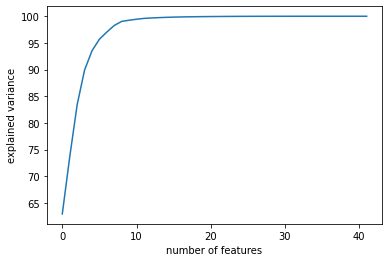

In [42]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("number of features")
plt.ylabel("explained variance")
plt.show()

In [50]:
#optimal number of features: 10

pca_10 = PCA(n_components=10, random_state=42)
pca_10.fit(x_train)
x_train_pca10 = pca_10.transform(x_train)
x_test_pca10 = pca_10.transform(x_test)
x_test_pca10.shape, sum(pca_10.explained_variance_ratio_ * 100)

((18, 10), 99.24916573032456)

In [58]:
scaler = StandardScaler()
scaler.fit(x_train_pca10)
x_pca_scaled = scaler.transform(x_train_pca10)
x_test_pca = scaler.transform(x_test_pca10)

In [59]:
pca_oversampling = pd.DataFrame(x_pca_scaled)
pca_oversampling["y"] = y_train_scaled

import imblearn
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
pca_oversampling.columns = pca_oversampling.columns.astype(str)
X_pca, labels_pca = sm.fit_resample(pca_oversampling, label_train)
y_pca = X_pca["y"]
X_pca = X_pca.drop(columns=["y"])
X_pca.shape, y_pca.shape, labels_pca.shape

((58, 10), (58,), (58,))

##Regression models


In [61]:
from tensorflow.keras.layers import *

input_shape = x_train_fs.shape

#trained on pca data
model_1 = tf.keras.Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1)
])

model_1.compile(loss="mae", optimizer="adam", metrics=["mae"])
model_1.fit(X_pca, y_pca, validation_data=(x_test_pca, y_test_scaled), epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 269ms/step - loss: 1.0582 - mae: 1.0582 - val_loss: 0.9452 - val_mae: 0.9452
Epoch 2/100
2/2 [==============================] - 0s 57ms/step - loss: 0.9313 - mae: 0.9313 - val_loss: 0.9334 - val_mae: 0.9334
Epoch 3/100
2/2 [==============================] - 0s 56ms/step - loss: 0.8210 - mae: 0.8210 - val_loss: 0.9230 - val_mae: 0.9230
Epoch 4/100
2/2 [==============================] - 0s 38ms/step - loss: 0.7205 - mae: 0.7205 - val_loss: 0.9140 - val_mae: 0.9140
Epoch 5/100
2/2 [==============================] - 0s 40ms/step - loss: 0.6545 - mae: 0.6545 - val_loss: 0.9083 - val_mae: 0.9083
Epoch 6/100
2/2 [==============================] - 0s 43ms/step - loss: 0.6309 - mae: 0.6309 - val_loss: 0.9021 - val_mae: 0.9021
Epoch 7/100
2/2 [==============================] - 0s 37ms/step - loss: 0.6094 - mae: 0.6094 - val_loss: 0.8950 - val_mae: 0.8950
Epoch 8/100
2/2 [==============================] - 0s 40ms/step - loss: 0.5955 - mae: 0.5

In [62]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
def evaluation(y_true, y_pred):
  eval = {}
  eval["accuracy"] = accuracy_score(y_true, y_pred)
  eval["f1"] = f1_score(y_true, y_pred)
  eval["precision"] = precision_score(y_true, y_pred)
  eval["recall"] = recall_score(y_true, y_pred)

  return eval

In [63]:
def get_labels(vec):
  labels = 1*(tf.squeeze(vec>sufficient_treshhold).numpy())
  return labels

In [70]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

cm_preds = scalery.inverse_transform(model_1.predict(x_test_pca))
print(f"cm contentpredictions: {tf.squeeze(cm_preds)}")
print(f"true cm content: {tf.squeeze(y_test)}")
print(f"regression r2 score: {r2_score(tf.squeeze(y_test), tf.squeeze(cm_preds))}")
print(f"mae: {mean_absolute_error(tf.squeeze(y_test), tf.squeeze(cm_preds))}")
print(f"mse: {mean_squared_error(tf.squeeze(y_test), tf.squeeze(cm_preds))}")

y_preds = get_labels(cm_preds)
eval_1 = evaluation(label_test, y_preds)
eval_1

1/1 [==============================] - 0s 83ms/step
cm contentpredictions: [71.25873  71.03017  69.1044   70.480835 21.59311  20.426205 34.276714
 68.55732  81.846695 63.016052 67.11085  65.94745  43.15399  68.59719
 67.05091  72.79915  34.776997 55.107872]
true cm content: [88 80 92 76 21 24 42 80 92 74 95 12 60  8 93 97 23 70]
regression r2 score: 0.38557983986304356
mae: 18.5941588083903
mse: 589.2384153639359


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.7222222222222222, 'f1': 0.0, 'precision': 0.0, 'recall': 0.0}

In [82]:
model_2 = tf.keras.Sequential([
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1)
])
model_2.compile(loss="mae", optimizer="adam")
model_2.fit(X_fs, y_fs, epochs=30, validation_data=(x_test_fs, y_test))

Epoch 1/30
2/2 [==============================] - 3s 447ms/step - loss: 1.0215 - val_loss: 62.8997
Epoch 2/30
2/2 [==============================] - 0s 81ms/step - loss: 0.8969 - val_loss: 62.7940
Epoch 3/30
2/2 [==============================] - 0s 70ms/step - loss: 0.8074 - val_loss: 62.6920
Epoch 4/30
2/2 [==============================] - 0s 55ms/step - loss: 0.7106 - val_loss: 62.6118
Epoch 5/30
2/2 [==============================] - 0s 52ms/step - loss: 0.6285 - val_loss: 62.5399
Epoch 6/30
2/2 [==============================] - 0s 73ms/step - loss: 0.5391 - val_loss: 62.4782
Epoch 7/30
2/2 [==============================] - 0s 51ms/step - loss: 0.4753 - val_loss: 62.4197
Epoch 8/30
2/2 [==============================] - 0s 71ms/step - loss: 0.4228 - val_loss: 62.3631
Epoch 9/30
2/2 [==============================] - 0s 63ms/step - loss: 0.3831 - val_loss: 62.3169
Epoch 10/30
2/2 [==============================] - 0s 61ms/step - loss: 0.3600 - val_loss: 62.2876
Epoch 11/30
2/2 [=

In [84]:
cm_preds = scalery.inverse_transform(model_2.predict(x_test_fs))
print(f"cm contentpredictions: {tf.round(tf.squeeze(cm_preds))}")
print(f"true cm content: {tf.squeeze(y_test)}")
print(f"regression r2 score: {r2_score(tf.squeeze(y_test), tf.squeeze(cm_preds))}")
print(f"mae: {mean_absolute_error(tf.squeeze(y_test), tf.squeeze(cm_preds))}")
print(f"mse: {mean_squared_error(tf.squeeze(y_test), tf.squeeze(cm_preds))}")

y_preds = get_labels(cm_preds)
eval_2 = evaluation(label_test, y_preds)
eval_2

1/1 [==============================] - 0s 60ms/step
cm contentpredictions: [95. 69. 74. 84. 65. 68. 77. 87. 90. 52. 85. 85. 77. 82. 88. 80. 77. 67.]
true cm content: [88 80 92 76 21 24 42 80 92 74 95 12 60  8 93 97 23 70]
regression r2 score: -0.19268054721796024
mae: 25.04422738817003
mse: 1143.7990503460242


{'accuracy': 0.6666666666666666, 'f1': 0.0, 'precision': 0.0, 'recall': 0.0}

In [109]:
#classification dense NN
model_3 = tf.keras.Sequential([
    # Input(shape=(10,)),
    Dense(64, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1, activation="sigmoid", name="output_layer")
])

model_3.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model_3.fit(X_fs, labels_fs, epochs=20, validation_data=(x_test_fs, label_test))

Epoch 1/20
2/2 [==============================] - 2s 353ms/step - loss: 0.7057 - accuracy: 0.4655 - val_loss: 0.7437 - val_accuracy: 0.4444
Epoch 2/20
2/2 [==============================] - 0s 71ms/step - loss: 0.6454 - accuracy: 0.5690 - val_loss: 0.7319 - val_accuracy: 0.4444
Epoch 3/20
2/2 [==============================] - 0s 106ms/step - loss: 0.6038 - accuracy: 0.6379 - val_loss: 0.7246 - val_accuracy: 0.4444
Epoch 4/20
2/2 [==============================] - 0s 103ms/step - loss: 0.5653 - accuracy: 0.7069 - val_loss: 0.7186 - val_accuracy: 0.4444
Epoch 5/20
2/2 [==============================] - 0s 60ms/step - loss: 0.5314 - accuracy: 0.7586 - val_loss: 0.7126 - val_accuracy: 0.3889
Epoch 6/20
2/2 [==============================] - 0s 37ms/step - loss: 0.4993 - accuracy: 0.8103 - val_loss: 0.7070 - val_accuracy: 0.4444
Epoch 7/20
2/2 [==============================] - 0s 38ms/step - loss: 0.4740 - accuracy: 0.8276 - val_loss: 0.7035 - val_accuracy: 0.5000
Epoch 8/20
2/2 [========

In [111]:
y_preds = tf.round(tf.squeeze(model_3.predict(x_test_fs)))
# y_preds, tf.squeeze(label_test)
eval_3 = evaluation(label_test, y_preds)
eval_3

1/1 [==============================] - 0s 93ms/step


{'accuracy': 0.6111111111111112,
 'f1': 0.3636363636363636,
 'precision': 0.3333333333333333,
 'recall': 0.4}

##Random Forest 

In [121]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=30, random_state=42)
regressor.fit(X_fs, y_fs)

RandomForestRegressor(n_estimators=30, random_state=42)

In [122]:
from sklearn.metrics import r2_score
y_preds = scalery.inverse_transform(regressor.predict(x_test_fs).reshape(-1,1))
print("pred values:", tf.squeeze(tf.round(y_preds)))
print("true values:", tf.squeeze(y_test))
r2 = r2_score(label_test, y_preds)
print(f"r2 score: {r2}")
y_preds = get_labels(y_preds)
# y_preds
eval_rf = evaluation(label_test, y_preds)
eval_rf

pred values: tf.Tensor([70. 56. 70. 86. 71. 67. 76. 80. 95. 61. 95. 78. 86. 72. 74. 73. 58. 63.], shape=(18,), dtype=float64)
true values: tf.Tensor([88 80 92 76 21 24 42 80 92 74 95 12 60  8 93 97 23 70], shape=(18,), dtype=int64)
r2 score: -27581.41471630925


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


{'accuracy': 0.8333333333333334,
 'f1': 0.5714285714285715,
 'precision': 1.0,
 'recall': 0.4}

##Logistic regression

In [125]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42).fit(X_fs, labels_fs)

In [127]:
y_preds = clf.predict(x_test_fs)

eval_lr = evaluation(label_test, y_preds)
eval_lr

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


{'accuracy': 0.7222222222222222,
 'f1': 0.6153846153846154,
 'precision': 0.5,
 'recall': 0.8}

In [129]:
all_model_results = pd.DataFrame({"regression with NN (feature selection)": eval_1,
                                  "regression with NN (PCA)": eval_2,
                                  "classifcation with NN": eval_3,
                                  "random forest regressor": eval_rf,
                                  "logistic regression": eval_lr})

all_model_results = round(all_model_results*100, 2).transpose()
all_model_results

,accuracy,f1,precision,recall
regression with NN (feature selection),72.22,0.00,0.00,0.0
regression with NN (PCA),66.67,0.00,0.00,0.0
classifcation with NN,61.11,36.36,33.33,40.0
random forest regressor,83.33,57.14,100.00,40.0
logistic regression,72.22,61.54,50.00,80.0


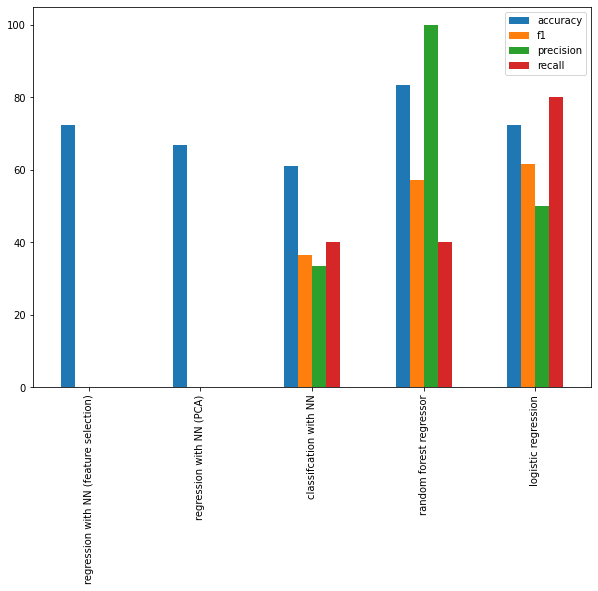

In [130]:
all_model_results.plot(kind="bar", figsize=(10, 7)).legend(bbox_to_anchor=(1.0, 1.0));